In [1]:
import tensorflow as tf
from IPython.display import Image
import os, os.path

In [4]:
def classify_image(image_path):    
    # Read in the image_data
    image_data = tf.gfile.FastGFile(image_path, 'rb').read()
    
    # Loads label file, strips off carriage return
    label_lines = [line.rstrip() for line in tf.gfile.GFile("primary_categories_labels_FINAL.txt")]
    
    #Image(image_path) 
    
    # Unpersists graph from file
    with tf.gfile.FastGFile("trained_models/primary_categories_graph_FINAL.pb", 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        _ = tf.import_graph_def(graph_def, name='')
        
    with tf.Session() as sess:
        # Feed the image_data as input to the graph and get first prediction
        softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')

        predictions = sess.run(softmax_tensor, {'DecodeJpeg/contents:0': image_data})

        # Sort to show labels of first prediction in order of confidence
        top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]

        for node_id in top_k:
            human_string = label_lines[node_id]
            score = predictions[0][node_id]
            print('%s (score = %.5f)' % (human_string, score))
            
    return Image(image_path)

street view (score = 0.86599)
exterior (score = 0.07971)
unknown (score = 0.01568)
swimming pool (score = 0.01516)
living room (score = 0.00870)
dining room (score = 0.00723)
kitchen (score = 0.00438)
bathroom (score = 0.00182)
bedroom (score = 0.00132)


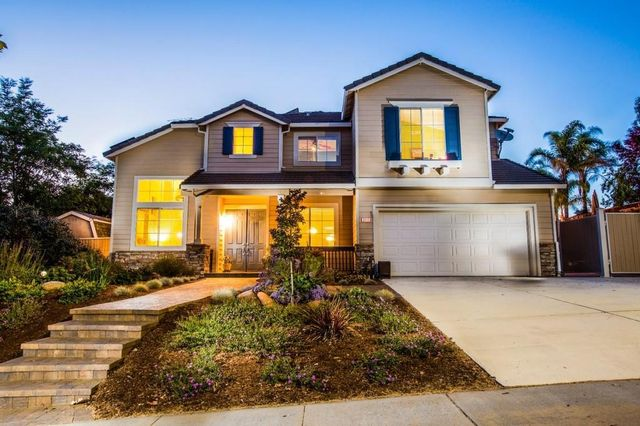

In [5]:
classify_image("e38b1d3c25d698d8d0c8537b156ea851l-m0xd-w640_h480_q80.jpg")

bathroom (score = 0.98206)
unknown (score = 0.00806)
kitchen (score = 0.00224)
exterior (score = 0.00201)
bedroom (score = 0.00168)
dining room (score = 0.00128)
living room (score = 0.00100)
swimming pool (score = 0.00099)
street view (score = 0.00069)


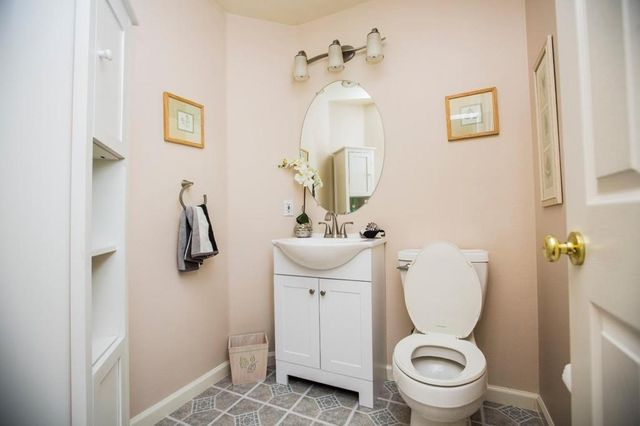

In [4]:
classify_image("e38b1d3c25d698d8d0c8537b156ea851l-m10xd-w640_h480_q80.jpg")

bedroom (score = 0.70818)
unknown (score = 0.11434)
living room (score = 0.08732)
dining room (score = 0.04891)
bathroom (score = 0.01083)
exterior (score = 0.00974)
kitchen (score = 0.00952)
swimming pool (score = 0.00854)
street view (score = 0.00262)


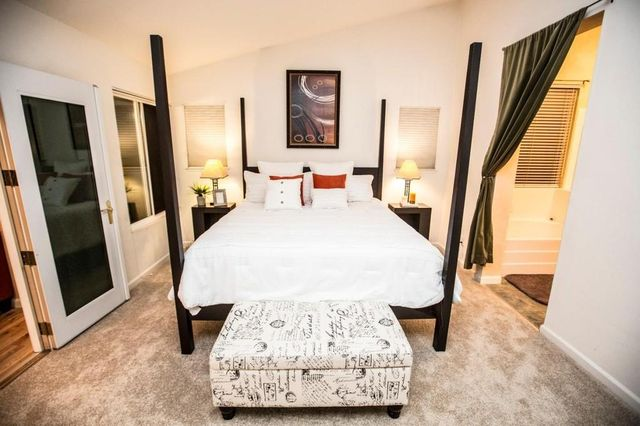

In [5]:
classify_image("e38b1d3c25d698d8d0c8537b156ea851l-m12xd-w640_h480_q80.jpg")

bathroom (score = 0.87850)
unknown (score = 0.08192)
bedroom (score = 0.01327)
exterior (score = 0.00737)
kitchen (score = 0.00675)
living room (score = 0.00458)
dining room (score = 0.00431)
swimming pool (score = 0.00167)
street view (score = 0.00163)


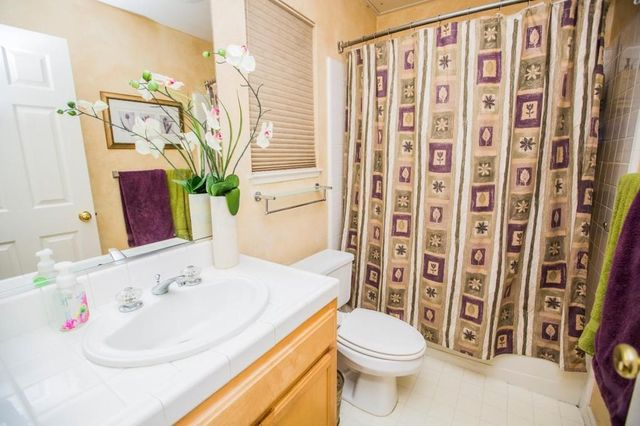

In [6]:
classify_image("e38b1d3c25d698d8d0c8537b156ea851l-m19xd-w640_h480_q80.jpg")

bathroom (score = 0.98164)
unknown (score = 0.00823)
kitchen (score = 0.00449)
bedroom (score = 0.00155)
exterior (score = 0.00122)
swimming pool (score = 0.00101)
living room (score = 0.00088)
dining room (score = 0.00068)
street view (score = 0.00031)


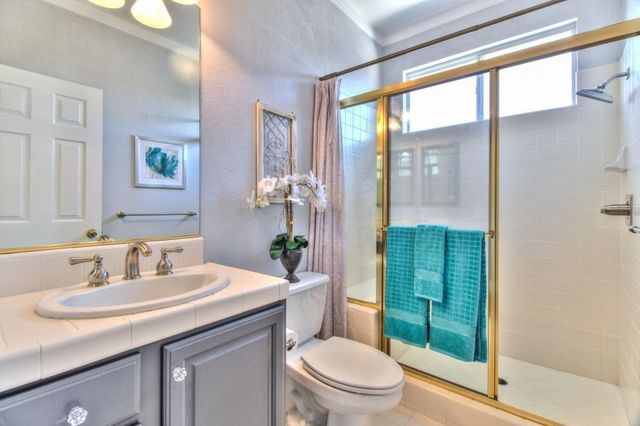

In [7]:
classify_image("31661baa9554cc92f575e81fd20e446el-m17xd-w640_h480_q80.jpg")

living room (score = 0.64733)
bedroom (score = 0.25437)
dining room (score = 0.04497)
unknown (score = 0.03877)
kitchen (score = 0.00535)
bathroom (score = 0.00389)
exterior (score = 0.00309)
swimming pool (score = 0.00112)
street view (score = 0.00111)


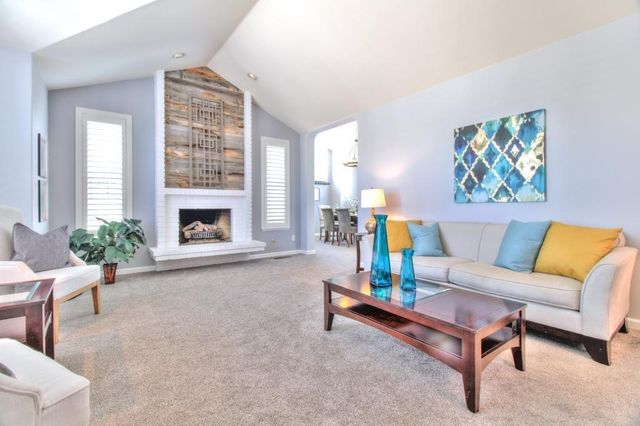

In [8]:
classify_image("31661baa9554cc92f575e81fd20e446el-m5xd-w640_h480_q80.jpg")

living room (score = 0.62135)
dining room (score = 0.17958)
bedroom (score = 0.09492)
unknown (score = 0.06063)
kitchen (score = 0.02604)
exterior (score = 0.00722)
bathroom (score = 0.00500)
street view (score = 0.00289)
swimming pool (score = 0.00237)


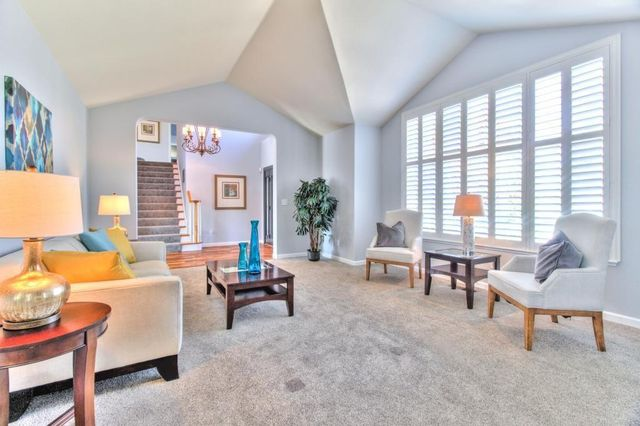

In [9]:
classify_image("31661baa9554cc92f575e81fd20e446el-m7xd-w640_h480_q80.jpg")

dining room (score = 0.91897)
living room (score = 0.02535)
unknown (score = 0.02027)
kitchen (score = 0.01087)
exterior (score = 0.00874)
bathroom (score = 0.00537)
bedroom (score = 0.00486)
swimming pool (score = 0.00312)
street view (score = 0.00246)


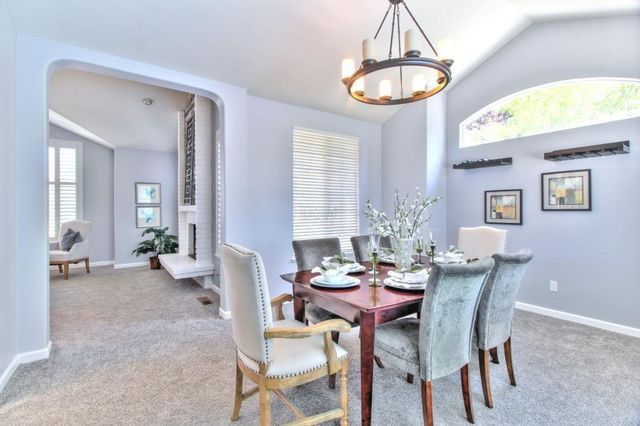

In [10]:
classify_image("31661baa9554cc92f575e81fd20e446el-m8xd-w640_h480_q80.jpg")

kitchen (score = 0.69681)
bathroom (score = 0.14484)
unknown (score = 0.07732)
dining room (score = 0.03987)
living room (score = 0.01823)
exterior (score = 0.00820)
bedroom (score = 0.00576)
street view (score = 0.00472)
swimming pool (score = 0.00424)


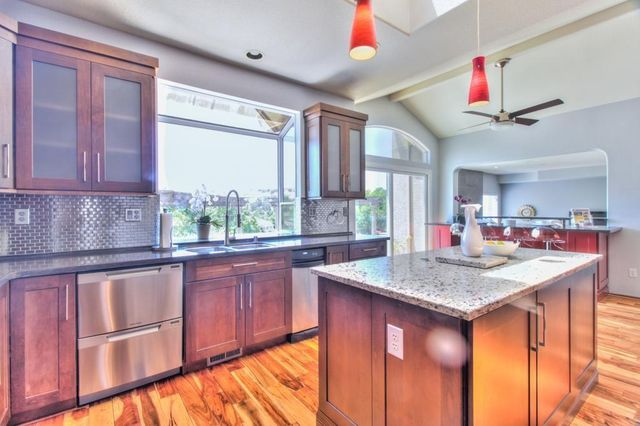

In [11]:
classify_image("31661baa9554cc92f575e81fd20e446el-m9xd-w640_h480_q80.jpg")

swimming pool (score = 0.97867)
exterior (score = 0.01227)
street view (score = 0.00549)
unknown (score = 0.00154)
bedroom (score = 0.00045)
living room (score = 0.00043)
dining room (score = 0.00043)
bathroom (score = 0.00042)
kitchen (score = 0.00030)


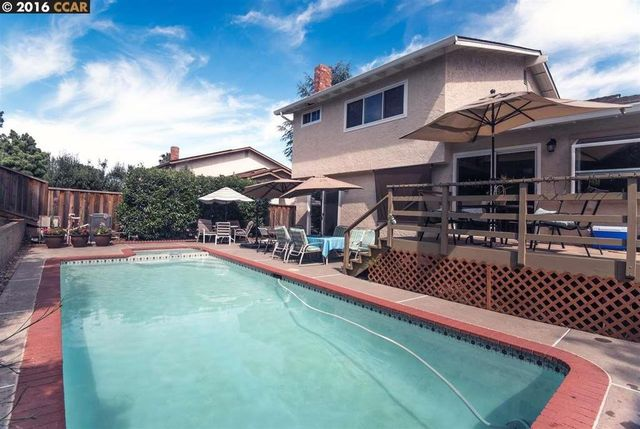

In [12]:
classify_image("377189c370da239170d63910c315d3a9l-m8xd-w640_h480_q80.jpg")

bathroom (score = 0.48988)
unknown (score = 0.33268)
bedroom (score = 0.05951)
kitchen (score = 0.03764)
dining room (score = 0.02516)
exterior (score = 0.02449)
living room (score = 0.01405)
swimming pool (score = 0.01081)
street view (score = 0.00580)


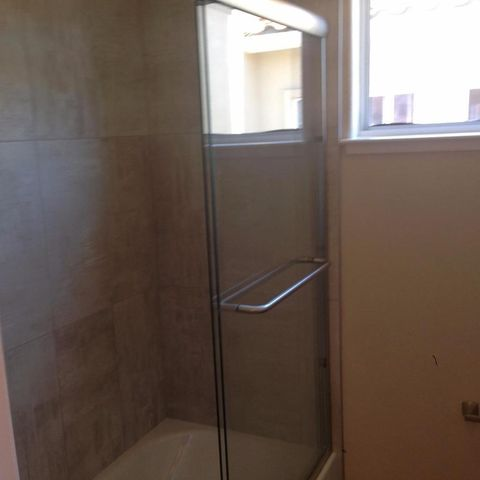

In [13]:
classify_image("43bc5d32762128fc4fa65a98d0f8873al-m15xd-w640_h480_q80.jpg")

living room (score = 0.40828)
unknown (score = 0.27071)
kitchen (score = 0.11688)
bedroom (score = 0.05954)
bathroom (score = 0.05650)
exterior (score = 0.04022)
dining room (score = 0.02718)
street view (score = 0.01466)
swimming pool (score = 0.00603)


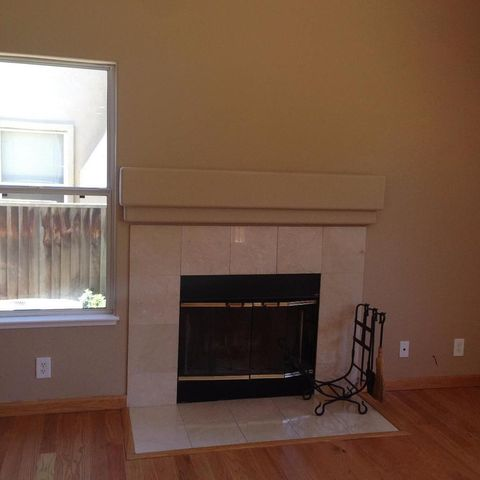

In [14]:
classify_image("43bc5d32762128fc4fa65a98d0f8873al-m4xd-w640_h480_q80.jpg")

unknown (score = 0.37066)
living room (score = 0.23502)
kitchen (score = 0.14774)
dining room (score = 0.13912)
bedroom (score = 0.07198)
exterior (score = 0.01124)
bathroom (score = 0.01101)
street view (score = 0.00808)
swimming pool (score = 0.00514)


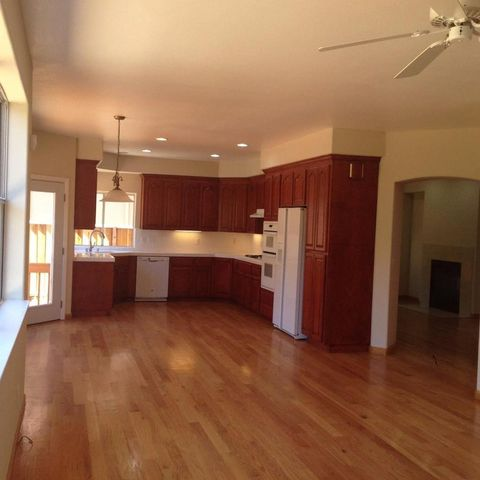

In [15]:
classify_image("43bc5d32762128fc4fa65a98d0f8873al-m5xd-w640_h480_q80.jpg")

### Spark implementation for deploying Model at Scale 

In [ ]:
with gfile.FastGFile( 'home_graph.pb', 'rb') as f:
  model_data = f.read()

model_data_bc = sc.broadcast(model_data)

In [ ]:
def classify_image_Spark(image_url):
    ...
    with tf.Graph().as_default() as g:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(model_data_bc.value)
    ...

### Testset validation - No Unknown, TOOK OUT Living Rooms with Ceiling Fans, Use Dining Tables and regular Dining Room Photos for Dining Rooms

In [2]:
# Loads label file, strips off carriage return
label_lines = [line.rstrip() for line in tf.gfile.GFile("primary_categories_no_unknowns_mixed_dining_no_ceiling_fans_labels.txt")]

# Unpersists graph from file
with tf.gfile.FastGFile("trained_models/primary_categories_no_unknowns_mixed_dining_no_ceiling_fans_graph.pb", 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

def classify_test_image(image_path):    
    # Read in the image_data
    image_data = tf.gfile.FastGFile(image_path, 'rb').read()
        
    #Image(image_path)         
    with tf.Session() as sess:
        # Feed the image_data as input to the graph and get first prediction
        softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')

        predictions = sess.run(softmax_tensor, {'DecodeJpeg/contents:0': image_data})

        # Sort to show labels of first prediction in order of confidence
        top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]
        
        category=[]
        score=[]
        for node_id in top_k:
            category.append(label_lines[node_id])
            score.append(predictions[0][node_id])
            #print('%s (score = %.5f)' % (label_lines[node_id], predictions[0][node_id]))
        
        most_likely_category, highest_score = category[score.index(max(score))], max(score)
        print image_path
        print('%s (score = %.5f)' % (most_likely_category, highest_score))
        
    return most_likely_category, highest_score

In [3]:
categories_list = ['bathroom','bedroom','dining room','exterior','kitchen','living room','street view','swimming pool']
predicted_list = {}

#For each category in the test photo set and get a list of predictions
for test_category in categories_list:
    photo_directory = 'testset/' + test_category
    predicted_list[test_category] = [classify_test_image(photo_directory + '/' + photo)[0] for photo in os.listdir(photo_directory)[1:]]

testset/bathroom/0391479e93c073af69575db7f0e5cbcal-m10xd-w640_h480_q80.jpg
bathroom (score = 0.98548)
testset/bathroom/0391479e93c073af69575db7f0e5cbcal-m8xd-w640_h480_q80.jpg
bedroom (score = 0.33595)
testset/bathroom/0507cb370de0a18e3709419cfb75c70al-m21xd-w640_h480_q80.jpg
bathroom (score = 0.98972)
testset/bathroom/07b8f5a1d1f5f674caddb8b71807aa9al-m6xd-w640_h480_q80.jpg
bathroom (score = 0.91873)
testset/bathroom/07b8f5a1d1f5f674caddb8b71807aa9al-m7xd-w640_h480_q80.jpg
bathroom (score = 0.35819)
testset/bathroom/07b8f5a1d1f5f674caddb8b71807aa9al-m8xd-w640_h480_q80.jpg
bathroom (score = 0.75850)
testset/bathroom/1482e6f20c079dee0da1e895d89ba6d5l-m13xd-w640_h480_q80.jpg
bathroom (score = 0.90701)
testset/bathroom/1c3323a7204a948f2f9c894b7fd7b048l-m13xd-w640_h480_q80.jpg
bathroom (score = 0.95940)
testset/bathroom/1c3323a7204a948f2f9c894b7fd7b048l-m23xd-w640_h480_q80.jpg
bathroom (score = 0.61722)
testset/bathroom/1c3323a7204a948f2f9c894b7fd7b048l-m24xd-w640_h480_q80.jpg
bathroom (sc

In [4]:
#Prediction accuracy and misclassifications summary
for category in categories_list:
    print "Number of photos in testset for", category, len(predicted_list[category])
    print "Accuracy for", category, ":", sum([1 for prediction in predicted_list[category] if prediction == category])*1.0/len(predicted_list[category])
    
    #Stats on misclassified
    misclassified = {}
    for prediction in predicted_list[category]:
        if prediction != category:
            if prediction in misclassified:
                misclassified[prediction] += 1
            else:
                misclassified[prediction] = 0
    print "For the", category, "category, these are the misclassifications:", sorted(misclassified.items(), key=lambda x: x[1], reverse=True)

Number of photos in testset for bathroom 200
Accuracy for bathroom : 0.945
For the bathroom category, these are the misclassifications: [('kitchen', 6), ('living room', 1), ('bedroom', 1)]
Number of photos in testset for bedroom 182
Accuracy for bedroom : 0.93956043956
For the bedroom category, these are the misclassifications: [('living room', 9), ('kitchen', 0)]
Number of photos in testset for dining room 39
Accuracy for dining room : 0.589743589744
For the dining room category, these are the misclassifications: [('living room', 10), ('bedroom', 3), ('exterior', 0)]
Number of photos in testset for exterior 253
Accuracy for exterior : 0.731225296443
For the exterior category, these are the misclassifications: [('street view', 55), ('swimming pool', 9), ('living room', 0), ('bedroom', 0)]
Number of photos in testset for kitchen 150
Accuracy for kitchen : 0.98
For the kitchen category, these are the misclassifications: [('bathroom', 1), ('living room', 0)]
Number of photos in testset fo